In [1]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt


/Users/Jack/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('../large_files/train.csv')
data = df.as_matrix()
np.random.shuffle(data)
X = data[:, 1:].reshape(-1, 28, 28, 1) / 255.0
Y = data[:, 0].astype(np.int32)
print(Y[1])
K = len(set(Y))
print(K)

/Users/Jack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


8
10


In [3]:
def y2indicator(y):
    N = len(y)
    y = y.astype(np.int32)
    ind = np.zeros((N, 10))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 96s 2ms/step - loss: 0.4734 - acc: 0.8284 - val_loss: 0.3760 - val_acc: 0.8571
Epoch 2/15
40199/40199 [==============================] - 97s 2ms/step - loss: 0.3305 - acc: 0.8788 - val_loss: 0.3365 - val_acc: 0.8756
Epoch 3/15
40199/40199 [==============================] - 95s 2ms/step - loss: 0.2905 - acc: 0.8930 - val_loss: 0.3099 - val_acc: 0.8852
Epoch 4/15
40199/40199 [==============================] - 94s 2ms/step - loss: 0.2594 - acc: 0.9041 - val_loss: 0.2823 - val_acc: 0.8981
Epoch 5/15
40199/40199 [==============================] - 94s 2ms/step - loss: 0.2361 - acc: 0.9124 - val_loss: 0.3071 - val_acc: 0.8947
Epoch 6/15
40199/40199 [==============================] - 96s 2ms/step - loss: 0.2162 - acc: 0.9192 - val_loss: 0.3041 - val_acc: 0.8901
Epoch 7/15
40199/40199 [==============================] - 96s 2ms/step - loss: 0.1955 - acc: 0.9270 - val_loss: 0.2861 - val_acc

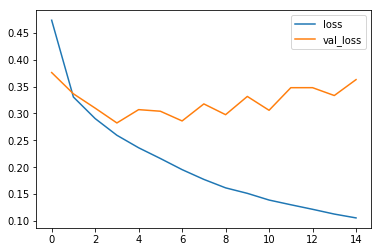

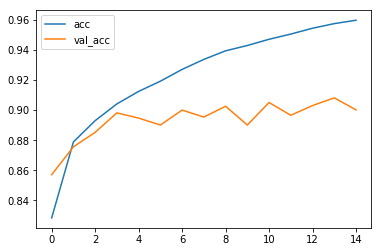

In [6]:
model = Sequential()

model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=300, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=K, activation="softmax"))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

final = model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=32)

plt.plot(final.history['loss'], label='loss')
plt.plot(final.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(final.history['acc'], label='acc')
plt.plot(final.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [8]:
print(K)
pred = model.predict(X[0].reshape(-1, 28, 28, 1))
print(pred)

10
[[3.3121935e-08 3.4573966e-13 7.8273814e-07 9.9999821e-01 3.1251577e-07
  1.3985041e-12 7.0800877e-07 7.6003620e-16 1.3550896e-11 7.7395459e-15]]
